## Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\12-KNN\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [5]:
df['animal name'].duplicated().sum()

1

In [6]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [7]:
df[df['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [8]:
df['animal name'][(df['animal name'] == 'frog') & (df['venomous'] == 0)] = 'frog1'
df['animal name'][(df['animal name'] == 'frog') & (df['venomous'] == 1)] = 'frog2'
df.head(30)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [9]:
df['animal name'].value_counts()

aardvark    1
polecat     1
seal        1
seahorse    1
scorpion    1
           ..
goat        1
gnat        1
girl        1
giraffe     1
wren        1
Name: animal name, Length: 101, dtype: int64

In [10]:
df['legs'].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

## Data visualization

In [11]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='legs', ylabel='count'>

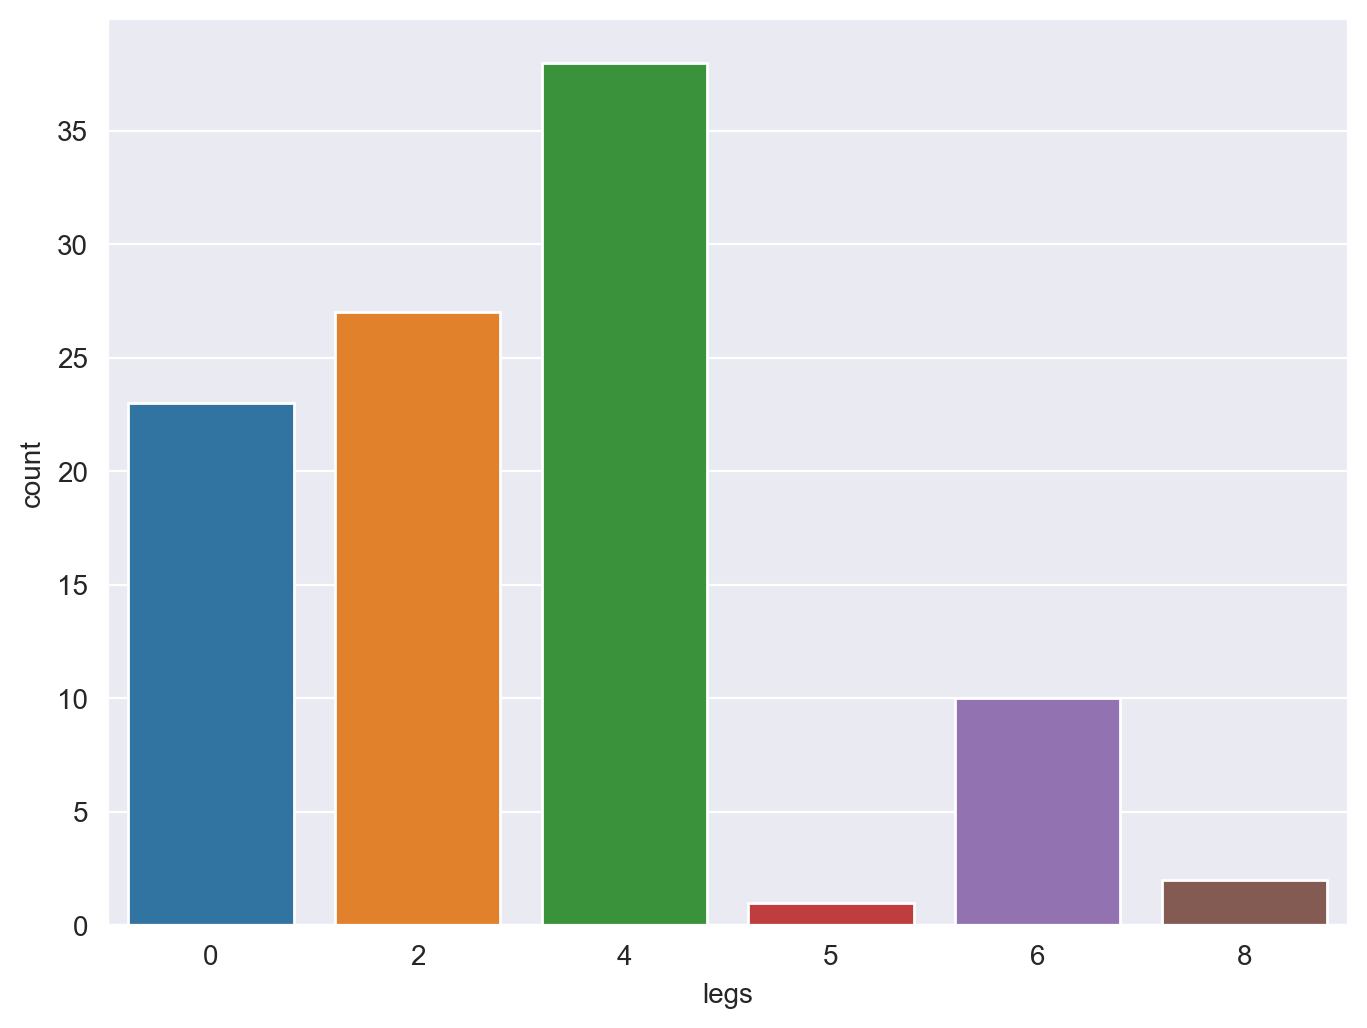

In [13]:
sns.countplot(df['legs'])

<AxesSubplot:xlabel='type', ylabel='count'>

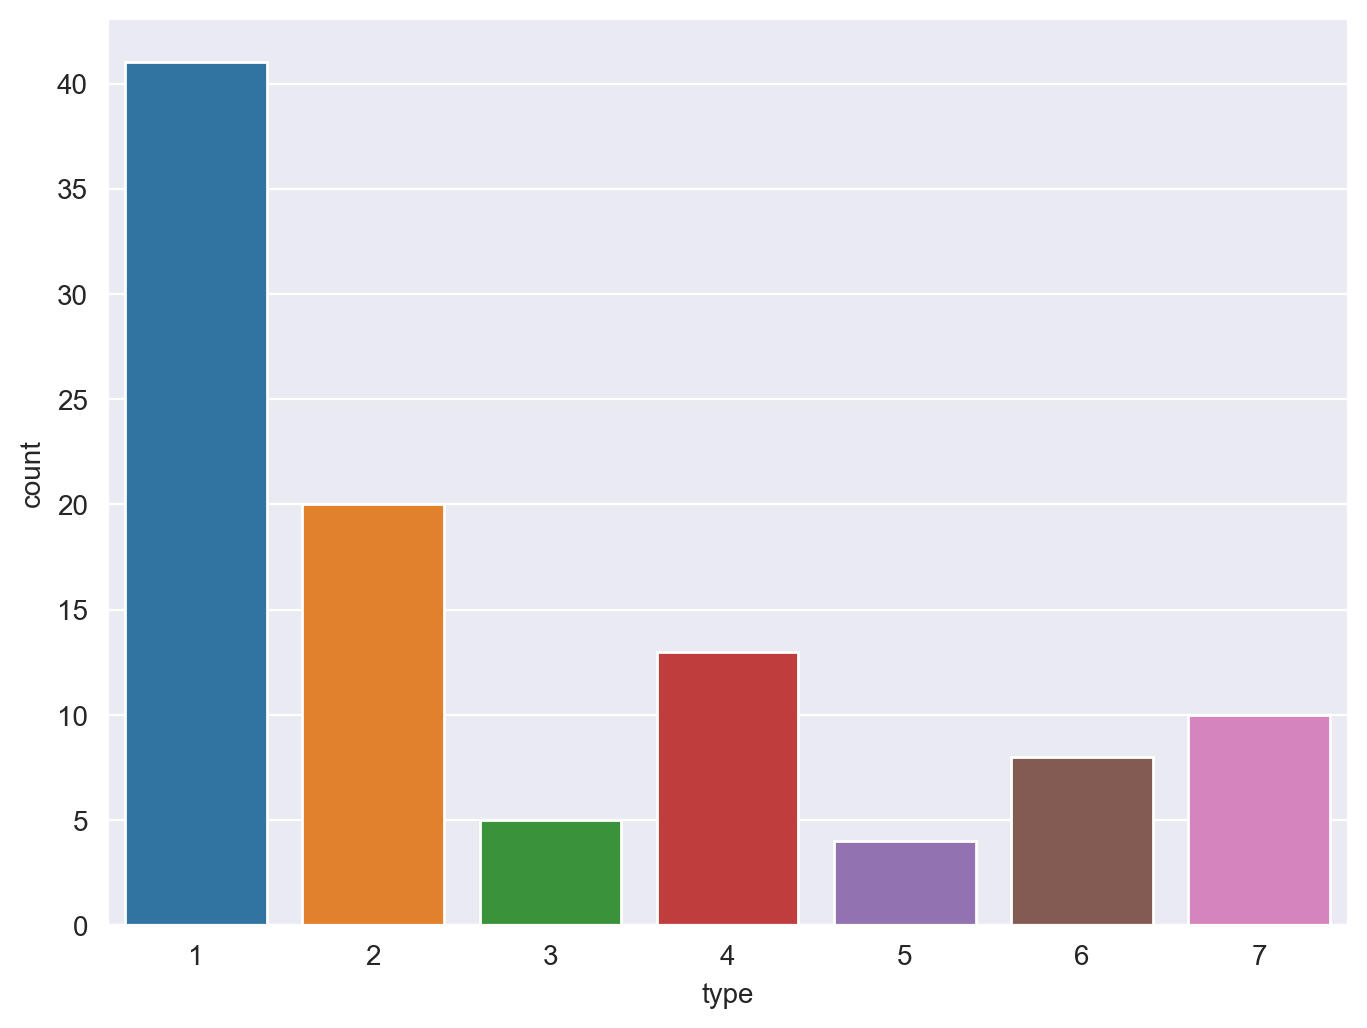

In [14]:
sns.countplot(df['type'])

## Spliting data

In [15]:
x = df.iloc[:,1:-1]
y = df['type']

## Building model

In [16]:
knn = KNeighborsClassifier()
kfold = KFold(n_splits=20)

In [17]:
c = cross_val_score(knn, x, y, cv=kfold)
c.mean()

0.8800000000000001

## Hyperparameter Tuning

In [18]:
params = {
    'n_neighbors' : np.array(range(1,30)),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

In [19]:
grid = GridSearchCV(estimator=knn, param_grid=params)

In [20]:
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']})

In [21]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [22]:
grid.best_score_

0.97

## Improved model

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
c = cross_val_score(knn, x, y, cv=kfold)
c.mean()

0.9800000000000001

In [25]:
knn.fit(x, y)
pred = knn.predict(x)
pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [26]:
df['Pred'] = pred
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Pred
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,7


In [27]:
df['Pred'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: Pred, dtype: int64